In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from graphviz import Source
from IPython.display import SVG
from IPython.core.display import display, HTML

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import warnings
warnings.filterwarnings("ignore")

## Data preparation
De aangeleverde dataset wordt ingelezen.

Kolommen die ons interessant lijken worden geisoleerd in een nieuwe DataFrame.
- stm_sap_meld_ddt Tijdstip van melding
- stm_geo_mld	Geo code van melding
- stm_equipm_nr_mld	Equipment nummer
- stm_equipm_soort_mld	Equipment soort
- stm_km_van_mld	Locatie bepaling via kilometerwaarde van
- stm_km_tot_mld	Locatie bepaling via kilometerwaarde tot
- stm_prioriteit	Prioriteitsindicatie
- stm_geo_gst	Geo code van melding
- stm_oorz_code	Oorzaak code
- stm_sap_melddatum	Datum melding
- stm_sap_meldtijd	Tijdstip melding
- stm_contractgeb_mld	Contract gebied melding
- stm_techn_mld	Techniekveld melding
- stm_techn_gst	Techniekveld melding
- stm_aanngeb_dd	Datum aannemer gebeld
- stm_aanngeb_tijd	Tijdstip aannemer gebeld
- stm_aanntpl_dd	Datum aannemer ter plaatse
- stm_aanntpl_tijd	Tijdstip aannemer ter plaatse
- stm_sap_storeinddatum	Datum einde storing
- stm_sap_storeindtijd	Tijdstip einde storing
- stm_fh_tijd	Tijdstip van functieherstel
- stm_fh_duur	Duur van functiehersteltijd

In [2]:
df_full = pd.read_csv("data/sap_storing_data_hu_project.csv", low_memory=False)

In [3]:
df = df_full[["stm_sap_meld_ddt",  "stm_geo_mld",  "stm_equipm_nr_mld",  "stm_equipm_soort_mld",  "stm_km_van_mld",  "stm_km_tot_mld",  "stm_prioriteit",  "stm_geo_gst",  "stm_oorz_code",  "stm_sap_melddatum",  "stm_sap_meldtijd",  "stm_contractgeb_mld",  "stm_techn_mld",  "stm_techn_gst",  "stm_aanngeb_dd",  "stm_aanngeb_tijd",  "stm_aanntpl_dd",  "stm_aanntpl_tijd", "stm_sap_storeinddatum", "stm_sap_storeindtijd", 'stm_fh_tijd', 'stm_fh_duur']]
df.head(10)

,stm_sap_meld_ddt,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst,stm_oorz_code,stm_sap_melddatum,...,stm_techn_mld,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_fh_tijd,stm_fh_duur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/2006 09:00:00,624.0,NaN,NaN,0.0,0.0,9.0,624.0,133.0,02/01/2006,...,NaN,S,02/01/2006,09:00:00,NaN,00:00:00,02/01/2006,09:00:00,09:00:00,0.0
2,02/01/2006 12:35:00,201.0,NaN,NaN,0.0,0.0,9.0,201.0,143.0,02/01/2006,...,NaN,B,02/01/2006,12:35:00,NaN,00:00:00,02/01/2006,13:26:00,13:26:00,51.0
3,02/01/2006 16:40:00,25.0,NaN,NaN,0.0,0.0,9.0,25.0,142.0,02/01/2006,...,NaN,B,02/01/2006,16:40:00,NaN,00:00:00,02/01/2006,17:20:00,17:20:00,40.0
4,02/01/2006 22:30:00,12.0,NaN,NaN,0.0,0.0,9.0,12.0,142.0,02/01/2006,...,NaN,B,02/01/2006,22:30:00,NaN,00:00:00,02/01/2006,22:36:00,22:36:00,6.0
5,02/01/2006 11:23:00,614.0,10621391.0,DETECTREIN,0.0,0.0,9.0,614.0,218.0,02/01/2006,...,S,S,02/01/2006,11:23:00,NaN,00:00:00,NaN,00:00:00,11:30:00,7.0
6,02/01/2006 23:25:00,551.0,NaN,NaN,0.0,0.0,9.0,551.0,142.0,02/01/2006,...,NaN,B,02/01/2006,23:25:00,NaN,00:00:00,03/01/2006,09:44:00,23:38:00,13.0
7,02/01/2006 16:45:00,17.0,NaN,NaN,0.0,0.0,9.0,17.0,143.0,02/01/2006,...,NaN,B,02/01/2006,16:45:00,NaN,00:00:00,02/01/2006,17:00:00,17:00:00,15.0
8,02/01/2006 14:18:00,506.0,10680137.0,OVERWEG,0.0,0.0,9.0,506.0,141.0,02/01/2006,...,B,B,02/01/2006,14:18:00,NaN,00:00:00,02/01/2006,14:48:00,14:48:00,30.0
9,02/01/2006 12:00:00,73.0,NaN,NaN,0.0,0.0,9.0,73.0,135.0,02/01/2006,...,NaN,B,02/01/2006,12:00:00,NaN,00:00:00,02/01/2006,12:00:00,12:00:00,0.0


In [4]:
df = df.drop_duplicates(keep='last')
df.count()

stm_sap_meld_ddt         657807
stm_geo_mld              649496
stm_equipm_nr_mld        484438
stm_equipm_soort_mld     484435
stm_km_van_mld           657804
stm_km_tot_mld           657804
stm_prioriteit           657688
stm_geo_gst              538901
stm_oorz_code            614029
stm_sap_melddatum        657777
stm_sap_meldtijd         657777
stm_contractgeb_mld      484354
stm_techn_mld            486954
stm_techn_gst            657592
stm_aanngeb_dd           636126
stm_aanngeb_tijd         657777
stm_aanntpl_dd           511219
stm_aanntpl_tijd         657777
stm_sap_storeinddatum    490920
stm_sap_storeindtijd     657777
stm_fh_tijd              657777
stm_fh_duur              657777
dtype: int64

In [5]:
df.dtypes

stm_sap_meld_ddt          object
stm_geo_mld               object
stm_equipm_nr_mld        float64
stm_equipm_soort_mld      object
stm_km_van_mld           float64
stm_km_tot_mld           float64
stm_prioriteit           float64
stm_geo_gst               object
stm_oorz_code            float64
stm_sap_melddatum         object
stm_sap_meldtijd          object
stm_contractgeb_mld      float64
stm_techn_mld             object
stm_techn_gst             object
stm_aanngeb_dd            object
stm_aanngeb_tijd          object
stm_aanntpl_dd            object
stm_aanntpl_tijd          object
stm_sap_storeinddatum     object
stm_sap_storeindtijd      object
stm_fh_tijd               object
stm_fh_duur              float64
dtype: object

### Niet alle columns zijn het correcte datatype
Hieronder worden de volgende aanpassingen gedaan:
- stm_sap_meldtijd -> datetime

In [6]:
df = df[df['stm_sap_storeindtijd']!="::"]
df = df[df['stm_sap_storeindtijd']!=":"]
df['stm_sap_storeind'] = pd.to_datetime(df['stm_sap_storeindtijd'] + ' ' + df['stm_sap_storeinddatum'],errors='coerce')
df['stm_sap_meld'] = pd.to_datetime(df['stm_sap_meldtijd'] + ' ' + df['stm_sap_melddatum'],errors='coerce')
df['stm_aanngeb'] = pd.to_datetime(df['stm_aanngeb_tijd'] + ' ' + df['stm_aanngeb_dd'],errors='coerce')
df['stm_aanntpl'] = pd.to_datetime(df['stm_aanntpl_tijd'] + ' ' + df['stm_aanntpl_dd'],errors='coerce')
df['stm_sap_storeind'].count()

490919

In [7]:
df = df[df['stm_fh_duur'].between(1, 360)]

In [8]:
# # Verkeerde/lege data droppen
df = df.dropna(subset=['stm_sap_storeind'])
df = df.dropna(subset=['stm_sap_meld'])
df['stm_sap_storeind'].count()

363045

In [9]:
df.dtypes

stm_sap_meld_ddt                 object
stm_geo_mld                      object
stm_equipm_nr_mld               float64
stm_equipm_soort_mld             object
stm_km_van_mld                  float64
stm_km_tot_mld                  float64
stm_prioriteit                  float64
stm_geo_gst                      object
stm_oorz_code                   float64
stm_sap_melddatum                object
stm_sap_meldtijd                 object
stm_contractgeb_mld             float64
stm_techn_mld                    object
stm_techn_gst                    object
stm_aanngeb_dd                   object
stm_aanngeb_tijd                 object
stm_aanntpl_dd                   object
stm_aanntpl_tijd                 object
stm_sap_storeinddatum            object
stm_sap_storeindtijd             object
stm_fh_tijd                      object
stm_fh_duur                     float64
stm_sap_storeind         datetime64[ns]
stm_sap_meld             datetime64[ns]
stm_aanngeb              datetime64[ns]


In [10]:
def GetAverageRepairTime(column):
    ret = df[['stm_fh_duur', column]]
    
    ret.dropna(inplace=True)
    ret.reset_index(inplace=True)
    del ret['index']

    ret = ret.groupby(column, as_index=False)['stm_fh_duur'].mean()
    ret.rename(columns={'stm_fh_duur': 'stm_fh_duur_avg'}, inplace=True)

    ret.set_index(column, inplace=True)

    return ret

## Data construction
De tijd kolommen worden verdeeld in stukken van een half uur zodat we tijd als categorische data kunnen gebruiken omdat deze als kwantitatieve data niet goed bruikbaar is.

In [11]:
df['stm_sap_meldtijd'] = pd.to_datetime(df['stm_sap_meldtijd'], errors='coerce')
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dt.floor('30T').dt.time
df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dropna()

In [12]:
df['stm_sap_meldtijd']

2         12:30:00
3         16:30:00
4         22:30:00
6         23:00:00
7         16:30:00
            ...   
898519    07:30:00
898521    08:00:00
898523    09:00:00
898524    14:00:00
898525    14:00:00
Name: stm_sap_meldtijd, Length: 363045, dtype: object

## Clusteren op techniekveld
Hieronder zien we dat er een aantal techniekvelden zijn die opvallen.
De storingen met als veld "H" duren aanzienlijk langer, terwijl de "P" storing juist weer aanzienlijk korter duren.

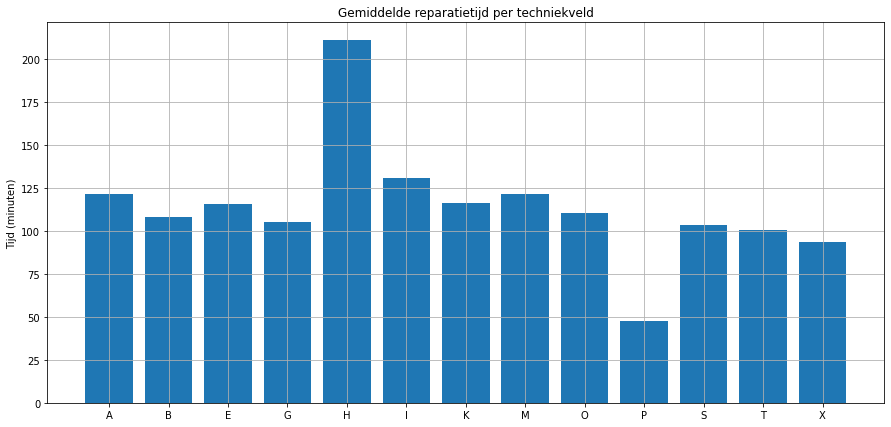

In [13]:
average_times_per_techfield = GetAverageRepairTime('stm_techn_mld')
plt.figure(figsize=[15,7])
plt.bar(average_times_per_techfield.index, average_times_per_techfield.stm_fh_duur_avg)
plt.title("Gemiddelde reparatietijd per techniekveld")
plt.ylabel("Tijd (minuten)")
plt.grid()

## Baseline
We gaan de baseline opstellen door het gemiddelde per techniekveld te gebruiken.

In [14]:
df_bl = df[['stm_fh_duur', 'stm_techn_mld']]

df_bl = pd.merge(   df_bl, 
                    GetAverageRepairTime('stm_techn_mld'), 
                    left_on='stm_techn_mld', right_on='stm_techn_mld')

print("Baseline MAE  :",mean_absolute_error(df_bl['stm_fh_duur_avg'], df_bl['stm_fh_duur']))
print("Baseline RMSE :",np.sqrt(mean_squared_error(df_bl['stm_fh_duur_avg'], df_bl['stm_fh_duur'])))

Baseline MAE  : 62.07368531022972
Baseline RMSE : 79.80622806102886


### Dummies encoden
Alle techniekvelden, prioriteiten en meldtijden afgerond op 30 minuten worden in dummies geplitst

In [15]:
df_reg = df[['stm_techn_mld', 'stm_prioriteit', 'stm_sap_meldtijd', 'stm_fh_duur']]

dummies1 = pd.get_dummies(df_reg['stm_techn_mld']).astype('category')
dummies2 = pd.get_dummies(df_reg['stm_sap_meldtijd']).astype('category')
dummies3 = pd.get_dummies(df_reg['stm_prioriteit']).astype('category')
df_reg = df_reg.join(dummies1).drop(columns=['stm_techn_mld'])
df_reg = df_reg.join(dummies2).drop(columns=['stm_sap_meldtijd'])
df_reg = df_reg.join(dummies3).drop(columns=['stm_prioriteit'])

X = df_reg.drop(columns=['stm_fh_duur'])
y = df_reg['stm_fh_duur']

print(X.dtypes)
X

A      category
B      category
E      category
G      category
H      category
         ...   
2.0    category
4.0    category
5.0    category
8.0    category
9.0    category
Length: 67, dtype: object


,A,B,E,G,H,I,K,M,O,P,...,22:00:00,22:30:00,23:00:00,23:30:00,1.0,2.0,4.0,5.0,8.0,9.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898519,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
898521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
898523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
898524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## DecisionTreeRegressor
Ik gebruik hier een decision tree regressor.
Deze scoort marginaal beter met een verbetering van 79 RMSE naar 76 RMSE.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = DecisionTreeRegressor(criterion='mse', random_state=870, min_impurity_decrease=0.5)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Decision Tree MAE  :",mean_absolute_error(y_pred, y_test))
print("Decision Tree RMSE :",np.sqrt(mean_squared_error(y_pred, y_test)))

Decision Tree MAE  : 58.8008577194877
Decision Tree RMSE : 76.62609402386052


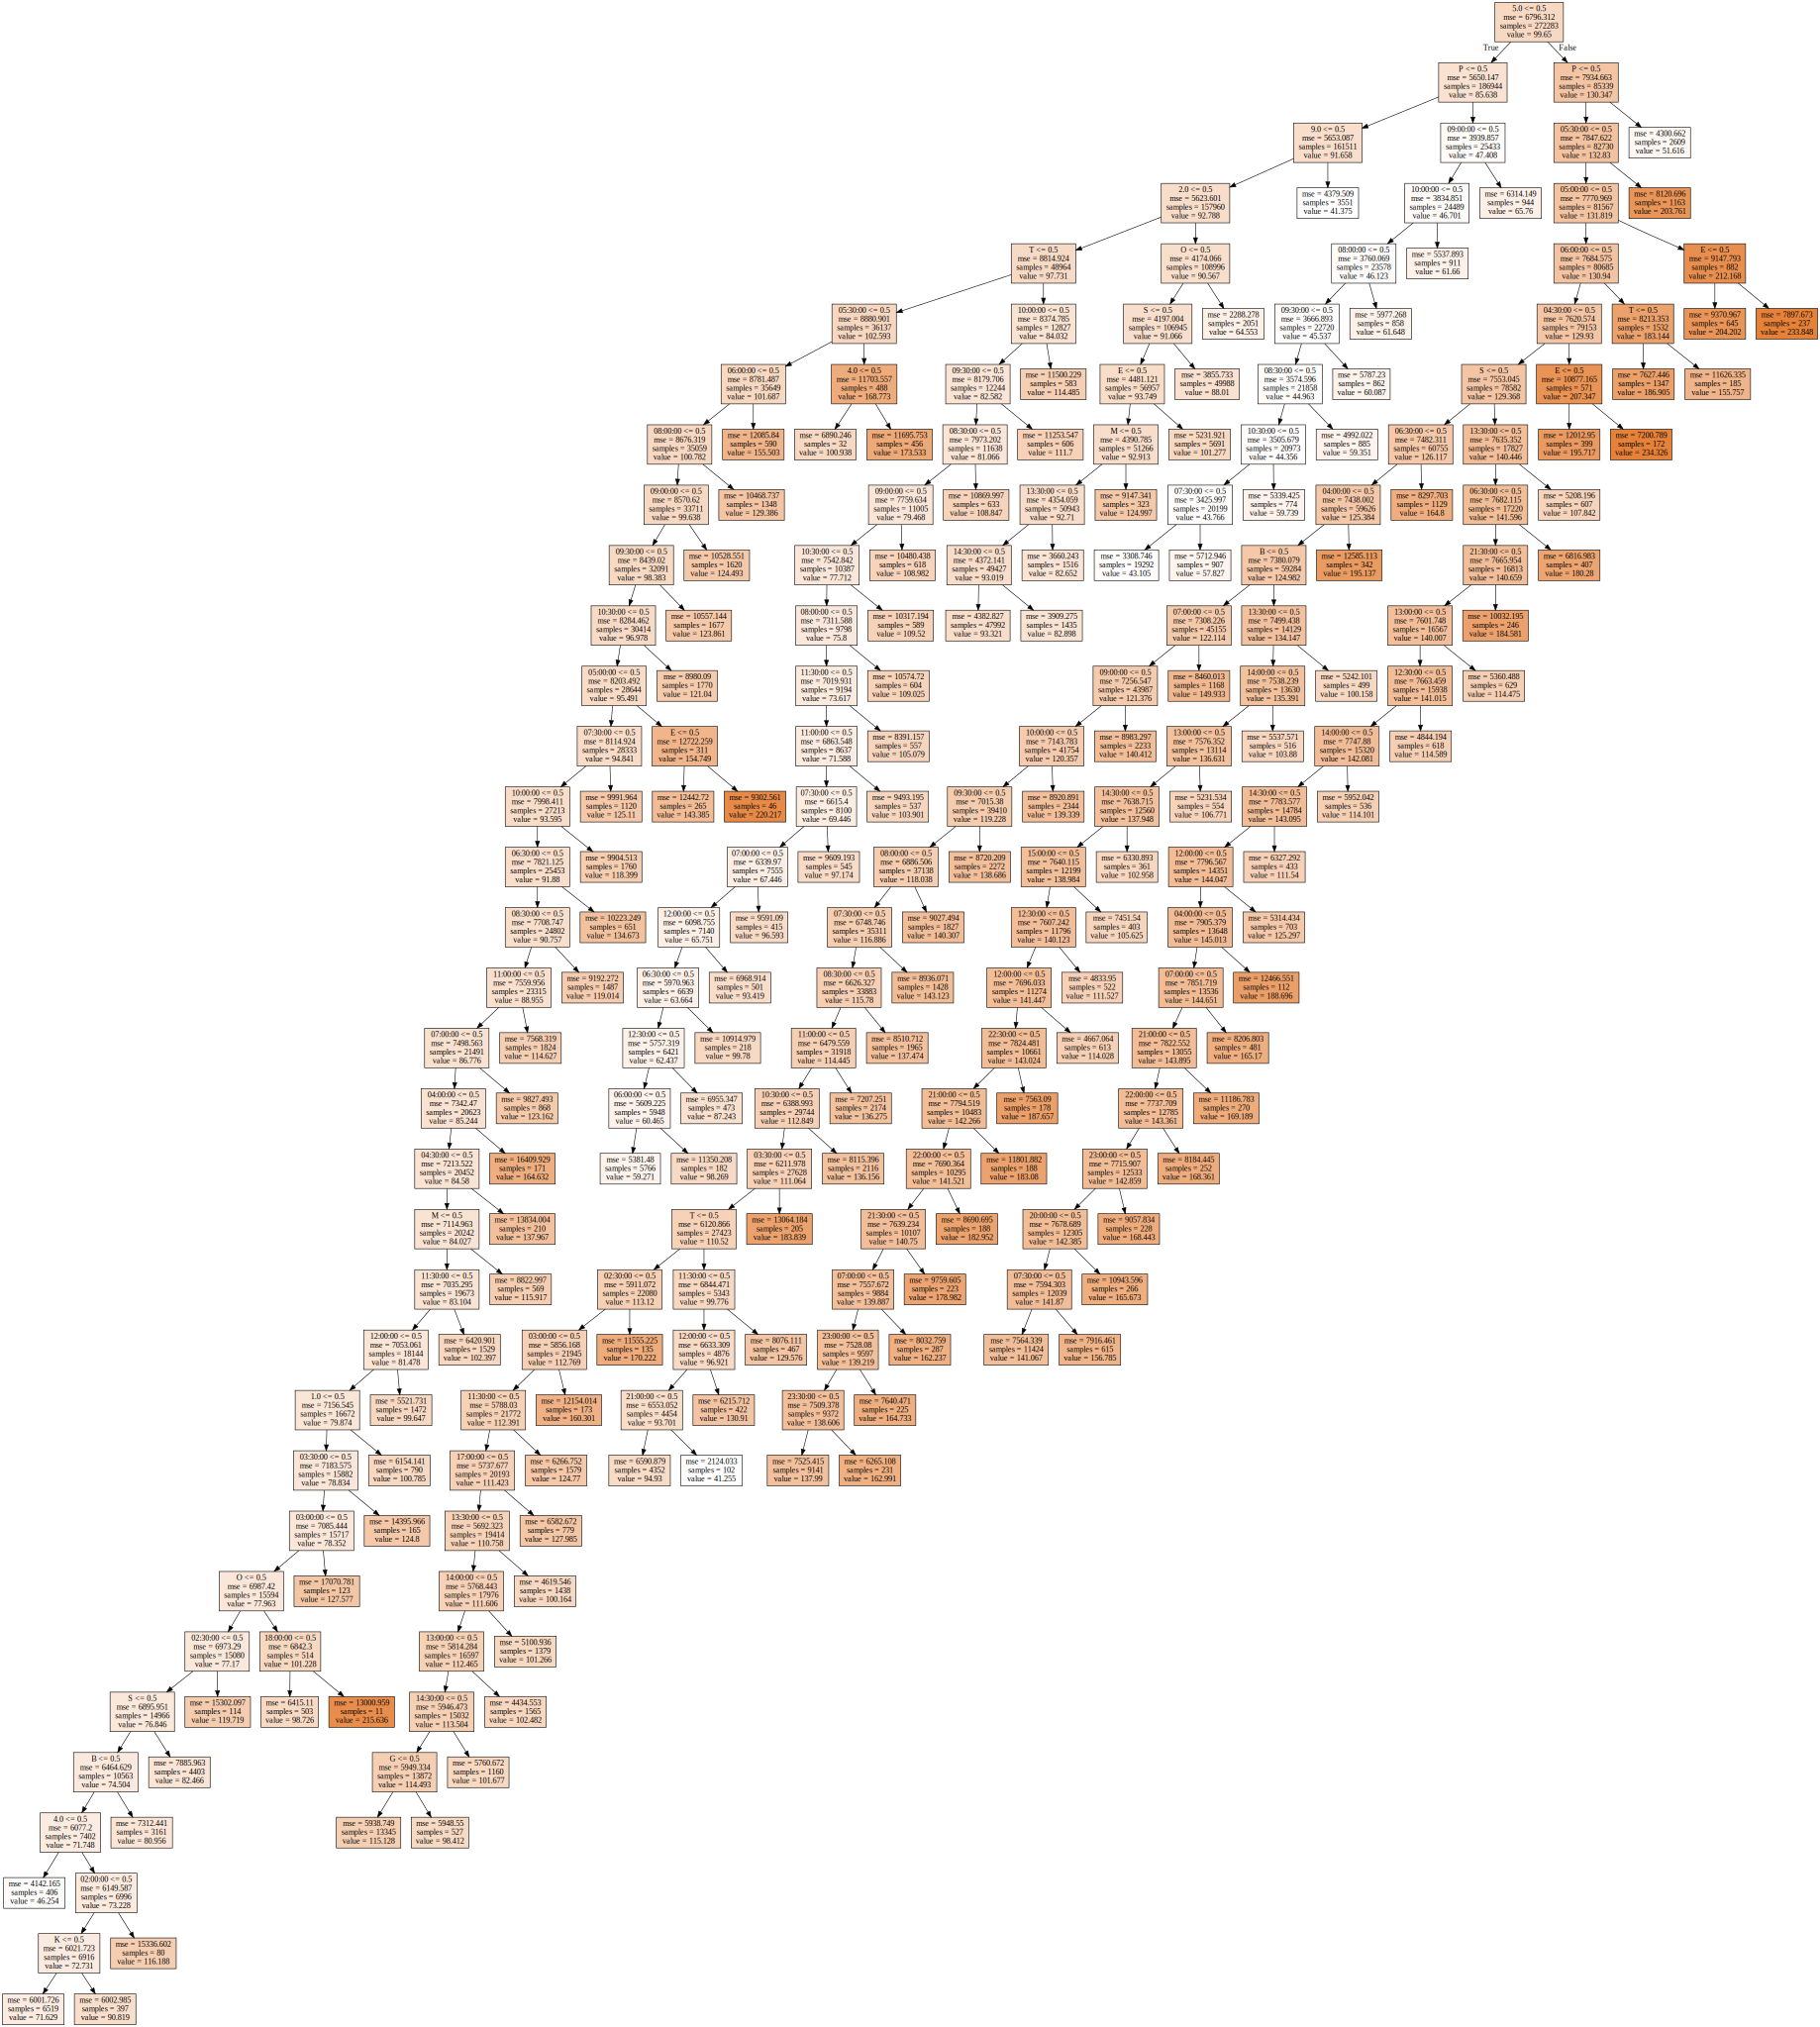

In [17]:
graph = Source( tree.export_graphviz(reg, out_file=None, feature_names=X.columns,filled=True))
SVG(graph.pipe(format='svg'))

# Validatie

In [74]:
def GetPredictions(reg, df, df_a):
    df['stm_sap_meldtijd'] = pd.to_datetime(df['stm_sap_meldtijd'], errors='coerce')
    df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dt.floor('30T').dt.time
    df['stm_sap_meldtijd'] = df['stm_sap_meldtijd'].dropna()
    
    df_reg = df[['stm_techn_mld', 'stm_prioriteit', 'stm_sap_meldtijd', 'stm_fh_duur']]

    dummies1 = pd.get_dummies(df_reg['stm_techn_mld']).astype('category')
    dummies2 = pd.get_dummies(df_reg['stm_sap_meldtijd']).astype('category')
    dummies3 = pd.get_dummies(df_reg['stm_prioriteit']).astype('category')
    df_reg = df_reg.join(dummies1).drop(columns=['stm_techn_mld'])
    df_reg = df_reg.join(dummies2).drop(columns=['stm_sap_meldtijd'])
    df_reg = df_reg.join(dummies3).drop(columns=['stm_prioriteit'])

    y = df_reg['stm_fh_duur']
    X = df_reg.drop(columns=['stm_fh_duur'])
    
    for col in df_a.columns:
        if col not in X.columns:
            X[col] = 0
            
    X = X.drop(columns=['stm_fh_duur'])
    
    return reg.predict(X), X, y

In [75]:
df_validatie = pd.read_csv("data/Validatieset Excel - met targetvariabelen V2.csv", delimiter=';')
predictions, X, y = GetPredictions(reg, df_validatie, df_reg)
predictions

array([123.1624424 , 125.10982143, 119.01412239, 119.01412239,
       124.49320988, 124.49320988, 114.62664474,  99.64741848,
        46.25369458,  46.25369458,  46.25369458,  46.25369458,
        43.10506946, 143.38490566,  82.466273  ,  59.27141866,
        46.25369458,  46.25369458,  43.10506946,  46.25369458,
        46.25369458, 119.71929825,  46.25369458,  46.25369458,
        46.25369458,  46.25369458,  46.25369458, 119.71929825,
       127.57723577, 124.8       , 124.8       , 100.9375    ,
       134.67281106, 134.67281106, 129.38575668, 124.49320988,
       118.39943182, 102.3969915 ,  99.64741848,  46.25369458,
       115.91739895, 119.71929825, 115.91739895,  46.25369458,
       115.91739895,  46.25369458,  46.25369458, 115.91739895,
        46.25369458, 115.91739895, 119.71929825, 119.71929825,
       127.57723577, 115.91739895, 124.8       , 115.91739895,
       137.96666667, 164.63157895, 137.96666667, 155.50338983,
       155.50338983, 114.62664474, 121.03954802, 123.16

In [76]:
MAE = mean_absolute_error(df_validatie['stm_fh_duur'],predictions)
RMSE = np.sqrt(mean_squared_error(df_validatie['stm_fh_duur'],predictions))

print("Validatie resultaten:")
print("MEA :",MAE)
print("RMSE:",RMSE)

Validatie resultaten:
MEA : 84.33026576043791
RMSE: 110.84721450513668


In [79]:
X['prediction'] = predictions
X['diff'] = abs(predictions - y)
X

,B,E,G,K,O,P,S,T,00:30:00,02:30:00,...,06:30:00,07:00:00,21:00:00,22:00:00,23:00:00,23:30:00,8.0,9.0,prediction,diff
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,123.162442,78.162442
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,125.109821,31.109821
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,119.014122,32.014122
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,119.014122,178.985878
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,124.493210,69.493210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,137.966667,133.966667
85,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,155.503390,94.503390
86,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,155.503390,94.503390
87,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,125.109821,30.890179


Text(0.5, 0, 'Afwijking (minuten)')

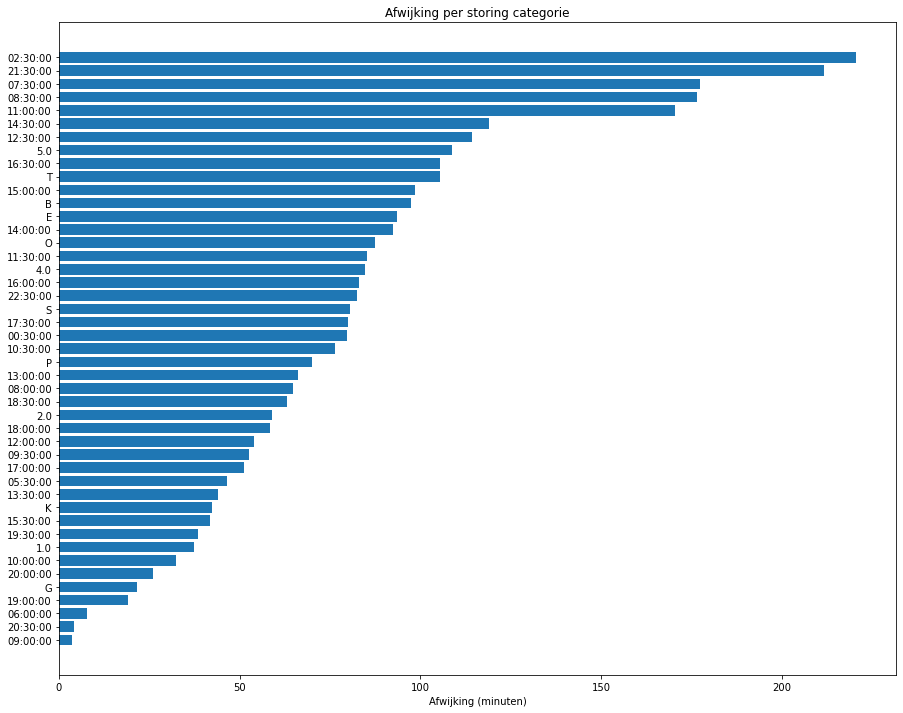

In [198]:
diffs = []
for col in X:
    mean = X[X[col]==1]['diff'].mean()
    diffs.append((col,mean))
  
diffs = pd.DataFrame(diffs, columns=['category','diff'])
diffs['category'] = diffs['category'].astype('str')
diffs = diffs.dropna()
diffs = diffs.sort_values(['diff'])
diffs
plt.figure(figsize=[15,12])
plt.barh(diffs['category'], diffs['diff'])
plt.title("Afwijking per storing categorie")
plt.xlabel("Afwijking (minuten)")